In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats

In [2]:
df_money = pd.read_csv('Money.csv')
df_cash = pd.read_csv('Cash.csv')
df_cheaters = pd.read_csv('Cheaters.csv')
df_AB_group = pd.read_csv('AB_group.csv')
df_platforms = pd.read_csv('Platforms.csv')

In [3]:
df_money

,user_id,date,money
0,N4TS2T-P7YTVX,15.07.2021,1.99
1,NX9S0D-VM20W8,16.07.2021,0.99
2,QYY6FW-FKHRND,15.07.2021,0.00
3,BRWH4Y-LPGBU6,14.07.2021,0.00
4,8O317F-4ASK53,13.07.2021,0.00
...,...,...,...
8639995,V2QN9A-KTAB7P,15.07.2021,0.00
8639996,UH5OG7-7KLM76,14.07.2021,0.99
8639997,6O1AE8-8AEE55,17.07.2021,0.99
8639998,33AD2T-TNRERG,12.07.2021,0.99


In [4]:
df_cheaters[df_cheaters['cheaters'] == 1]

,user_id,cheaters
65,9WIF40-OW5GLD,1
778,VIHC8Q-YTCOYH,1
4060,1JBTR8-YEDSAI,1
5520,KK8ZQ3-ZZVKN4,1
6631,IC2BED-VNNI2F,1
...,...,...
8630371,5I00P2-5EC43C,1
8630756,BMML50-JSSXDT,1
8634037,NT0YYQ-5WA319,1
8636269,0MMIPN-E23IZG,1


In [5]:
true_cheaters = df_cheaters[df_cheaters['cheaters'] == 1]

In [6]:
df_money[df_money['user_id'].isin(true_cheaters['user_id'])==False].reset_index(drop=True)

,user_id,date,money
0,N4TS2T-P7YTVX,15.07.2021,1.99
1,NX9S0D-VM20W8,16.07.2021,0.99
2,QYY6FW-FKHRND,15.07.2021,0.00
3,BRWH4Y-LPGBU6,14.07.2021,0.00
4,8O317F-4ASK53,13.07.2021,0.00
...,...,...,...
8637171,V2QN9A-KTAB7P,15.07.2021,0.00
8637172,UH5OG7-7KLM76,14.07.2021,0.99
8637173,6O1AE8-8AEE55,17.07.2021,0.99
8637174,33AD2T-TNRERG,12.07.2021,0.99


In [7]:
df_money_without_cheaters = df_money[df_money['user_id'].isin(true_cheaters['user_id'])==False].reset_index(drop=True)

In [8]:
df_money_without_cheaters.groupby('user_id').agg({'money':'sum'}).reset_index()

,user_id,money
0,00036L-1T885I,3.97
1,0004MK-MRBUKF,5.95
2,0004MK-VW0O9L,4.96
3,0005S4-UEC6BE,5.95
4,0007I5-EWUD6O,6.94
...,...,...
1079642,ZZZPEX-P2T8BH,6.95
1079643,ZZZTEN-0QGZ3X,5.97
1079644,ZZZTR5-QSI6D3,0.99
1079645,ZZZV9K-NM9B4Z,3.97


In [9]:
df_group_money = df_money_without_cheaters.groupby('user_id').agg({'money':'sum'}).reset_index()

In [10]:
df_cash

,user_id,date,cash
0,GGLSXL-U5BGGY,17.07.2021,200
1,DPWFFN-NL3VF8,16.07.2021,150
2,PASNNG-GVW4RR,11.07.2021,1100
3,4F0AW7-F40GY9,15.07.2021,1050
4,CEY6AF-YTSM4V,15.07.2021,150
...,...,...,...
8639995,OWJZJH-CNSFHZ,17.07.2021,3150
8639996,A6ZAWD-VD21JU,15.07.2021,200
8639997,L9NUIR-HM22U9,15.07.2021,200
8639998,0A5AY6-NB4ZIS,15.07.2021,200


In [11]:
df_cash[df_cash['user_id'].isin(true_cheaters['user_id'])==False].reset_index(drop=True)

,user_id,date,cash
0,GGLSXL-U5BGGY,17.07.2021,200
1,DPWFFN-NL3VF8,16.07.2021,150
2,PASNNG-GVW4RR,11.07.2021,1100
3,4F0AW7-F40GY9,15.07.2021,1050
4,CEY6AF-YTSM4V,15.07.2021,150
...,...,...,...
8637171,OWJZJH-CNSFHZ,17.07.2021,3150
8637172,A6ZAWD-VD21JU,15.07.2021,200
8637173,L9NUIR-HM22U9,15.07.2021,200
8637174,0A5AY6-NB4ZIS,15.07.2021,200


In [12]:
df_cash_without_cheaters = df_cash[df_cash['user_id'].isin(true_cheaters['user_id'])==False].reset_index(drop=True)

In [13]:
df_cash_without_cheaters.groupby(['user_id','date']).agg({'cash':'sum'}).reset_index()

,user_id,date,cash
0,00036L-1T885I,10.07.2021,700
1,00036L-1T885I,11.07.2021,0
2,00036L-1T885I,12.07.2021,1500
3,00036L-1T885I,13.07.2021,850
4,00036L-1T885I,14.07.2021,650
...,...,...,...
8637171,ZZZVH1-2OJT7I,13.07.2021,650
8637172,ZZZVH1-2OJT7I,14.07.2021,1400
8637173,ZZZVH1-2OJT7I,15.07.2021,100
8637174,ZZZVH1-2OJT7I,16.07.2021,550


In [14]:
df_group_cash = df_cash_without_cheaters.groupby('user_id').agg({'cash':'sum'}).reset_index()

In [15]:
df_cash_money = pd.merge(df_group_money,df_group_cash, how ='inner', on = 'user_id')

In [16]:
df_cash_money[df_cash_money['money'] == 0]

,user_id,money,cash
1849,027YD0-7N2S50,0.0,203400
7479,091QZN-XYWQ8D,0.0,78500
11888,0E95BB-LTAHXQ,0.0,166000
13672,0GCX0G-5BZ6HE,0.0,122650
13778,0GH23F-XS6VSB,0.0,152150
...,...,...,...
1072760,ZRQNJL-5G1WXO,0.0,97950
1075049,ZUEJJE-KN8O77,0.0,121400
1076010,ZVKT51-78VHI9,0.0,214500
1076232,ZVTA85-CT6B66,0.0,200


In [17]:
df_cash_money

,user_id,money,cash
0,00036L-1T885I,3.97,7600
1,0004MK-MRBUKF,5.95,6150
2,0004MK-VW0O9L,4.96,6300
3,0005S4-UEC6BE,5.95,5000
4,0007I5-EWUD6O,6.94,6350
...,...,...,...
1079642,ZZZPEX-P2T8BH,6.95,6600
1079643,ZZZTEN-0QGZ3X,5.97,4600
1079644,ZZZTR5-QSI6D3,0.99,5900
1079645,ZZZV9K-NM9B4Z,3.97,3900


In [18]:
df_without_payers = df_cash_money[df_cash_money['money'] == 0]

<AxesSubplot:>

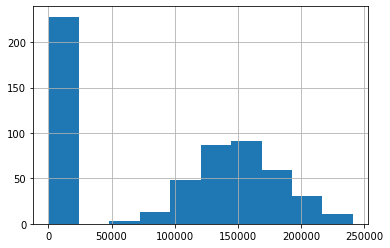

In [19]:
df_without_payers['cash'].hist()

In [20]:
df_without_payers[(df_without_payers['cash']>=50000) & (df_without_payers['money'] == 0)]

,user_id,money,cash
1849,027YD0-7N2S50,0.0,203400
7479,091QZN-XYWQ8D,0.0,78500
11888,0E95BB-LTAHXQ,0.0,166000
13672,0GCX0G-5BZ6HE,0.0,122650
13778,0GH23F-XS6VSB,0.0,152150
...,...,...,...
1071842,ZQNX2R-TGBYZ0,0.0,147200
1072760,ZRQNJL-5G1WXO,0.0,97950
1075049,ZUEJJE-KN8O77,0.0,121400
1076010,ZVKT51-78VHI9,0.0,214500


In [21]:
df_cash_from_50000 = df_without_payers[(df_without_payers['cash']>=50000) & (df_without_payers['money'] == 0)]

In [22]:
df_cash_money = df_cash_money[df_cash_money['user_id'].isin(df_cash_from_50000['user_id'])==False].reset_index(drop=True)

In [23]:
df_cash_money

,user_id,money,cash
0,00036L-1T885I,3.97,7600
1,0004MK-MRBUKF,5.95,6150
2,0004MK-VW0O9L,4.96,6300
3,0005S4-UEC6BE,5.95,5000
4,0007I5-EWUD6O,6.94,6350
...,...,...,...
1079299,ZZZPEX-P2T8BH,6.95,6600
1079300,ZZZTEN-0QGZ3X,5.97,4600
1079301,ZZZTR5-QSI6D3,0.99,5900
1079302,ZZZV9K-NM9B4Z,3.97,3900


In [24]:
df_cash_money[df_cash_money['money']==0]

,user_id,money,cash
17433,0KPV39-O1MUV9,0.0,1700
19005,0MMVCM-HBF4AI,0.0,2450
23851,0SGW64-PCR1XD,0.0,4500
27778,0X3CZN-XBP5PB,0.0,2400
29521,0Z7V9E-SAHQ6U,0.0,3050
...,...,...,...
1056139,Z89FQ6-DMFBLF,0.0,4450
1060014,ZCWX91-IQEE8Z,0.0,4050
1065936,ZJY0Y4-82LIEM,0.0,4000
1069065,ZNP8N6-LLEZX7,0.0,3600


In [25]:
df_money_0 = df_cash_money[df_cash_money['money']==0]

In [26]:
df_payers = df_cash_money[df_cash_money['user_id'].isin(df_money_0['user_id'])==False].reset_index(drop=True)

In [27]:
df_payers

,user_id,money,cash
0,00036L-1T885I,3.97,7600
1,0004MK-MRBUKF,5.95,6150
2,0004MK-VW0O9L,4.96,6300
3,0005S4-UEC6BE,5.95,5000
4,0007I5-EWUD6O,6.94,6350
...,...,...,...
1079071,ZZZPEX-P2T8BH,6.95,6600
1079072,ZZZTEN-0QGZ3X,5.97,4600
1079073,ZZZTR5-QSI6D3,0.99,5900
1079074,ZZZV9K-NM9B4Z,3.97,3900


In [28]:
df_platforms[df_platforms['platform'] == 'PC']

,user_id,platform
2,1UWMRN-8NVCLI,PC
6,QY72E9-WIG65T,PC
8,K1NGEU-203Y4H,PC
11,3JRLKN-99RSU5,PC
16,7PJ6SJ-0LT4XB,PC
...,...,...
8639977,L92BCL-ATZJO8,PC
8639985,AQPVGJ-4I5JBX,PC
8639992,YO1GXX-ITQ794,PC
8639998,B5FT8W-AR75PV,PC


In [29]:
df_pc = df_platforms[df_platforms['platform'] == 'PC']

In [30]:
df_pc.drop_duplicates()

,user_id,platform
2,1UWMRN-8NVCLI,PC
6,QY72E9-WIG65T,PC
8,K1NGEU-203Y4H,PC
11,3JRLKN-99RSU5,PC
16,7PJ6SJ-0LT4XB,PC
...,...,...
6689958,PC9KHF-C61KW1,PC
6698949,SLS6Q6-F3AUKD,PC
6706781,USQF0D-YPPPD4,PC
6760354,9XSCYJ-13BSBV,PC


In [31]:
df_pc_without_duplicates = df_pc.drop_duplicates()

In [32]:
df_pc_without_duplicates[df_pc_without_duplicates['user_id'].isin(true_cheaters['user_id'])==False].reset_index(drop=True)

,user_id,platform
0,1UWMRN-8NVCLI,PC
1,QY72E9-WIG65T,PC
2,K1NGEU-203Y4H,PC
3,3JRLKN-99RSU5,PC
4,7PJ6SJ-0LT4XB,PC
...,...,...
359891,PC9KHF-C61KW1,PC
359892,SLS6Q6-F3AUKD,PC
359893,USQF0D-YPPPD4,PC
359894,9XSCYJ-13BSBV,PC


In [33]:
df_pc_without_cheaters = df_pc_without_duplicates[df_pc_without_duplicates['user_id'].isin(true_cheaters['user_id'])==False].reset_index(drop=True)

In [34]:
df_pc_without_cheaters

,user_id,platform
0,1UWMRN-8NVCLI,PC
1,QY72E9-WIG65T,PC
2,K1NGEU-203Y4H,PC
3,3JRLKN-99RSU5,PC
4,7PJ6SJ-0LT4XB,PC
...,...,...
359891,PC9KHF-C61KW1,PC
359892,SLS6Q6-F3AUKD,PC
359893,USQF0D-YPPPD4,PC
359894,9XSCYJ-13BSBV,PC


In [35]:
df_cash_money_pc = pd.merge(df_cash_money, df_pc_without_cheaters)

In [36]:
df_cash_money_pc

,user_id,money,cash,platform
0,0004MK-VW0O9L,4.96,6300,PC
1,0005S4-UEC6BE,5.95,5000,PC
2,0007I5-EWUD6O,6.94,6350,PC
3,000GCO-EY0QBQ,5.95,5550,PC
4,000GOD-0KXGY5,5.94,4900,PC
...,...,...,...,...
359548,ZZZC9G-FQ4ABS,6.94,5450,PC
359549,ZZZIS2-9EYJF3,3.96,7100,PC
359550,ZZZONB-1W7QEW,6.95,6750,PC
359551,ZZZPEX-P2T8BH,6.95,6600,PC


In [37]:
df_cash_money_pc['cash'].sum()

2151767250

In [38]:
df_pc_cash = df_cash_money_pc['cash'].sum()

In [39]:
df_pc_payers = pd.merge(df_payers,df_pc_without_cheaters)

In [40]:
df_pc_payers

,user_id,money,cash,platform
0,0004MK-VW0O9L,4.96,6300,PC
1,0005S4-UEC6BE,5.95,5000,PC
2,0007I5-EWUD6O,6.94,6350,PC
3,000GCO-EY0QBQ,5.95,5550,PC
4,000GOD-0KXGY5,5.94,4900,PC
...,...,...,...,...
359460,ZZZC9G-FQ4ABS,6.94,5450,PC
359461,ZZZIS2-9EYJF3,3.96,7100,PC
359462,ZZZONB-1W7QEW,6.95,6750,PC
359463,ZZZPEX-P2T8BH,6.95,6600,PC


In [41]:
df_cash_money_pc['money'].sum()/359553

5.957683401334434

In [42]:
pc_arpu = df_cash_money_pc['money'].sum()/359553

In [43]:
df_pc_payers['money'].sum()/359465

5.959141891421974

In [44]:
pc_arppu = df_pc_payers['money'].sum()/359465

In [45]:
df_AB_group

,user_id,group
0,VX6NLA-F5YMSW,control
1,2AXN3D-71ZN86,test
2,K78V3J-TQMV6F,test
3,Z2KEIG-LY3V4H,test
4,ND92RZ-SHG980,control
...,...,...
8639995,SCIQGB-VYD7YG,test
8639996,T4PH1E-0FS4DN,test
8639997,YTXXO7-UEM0CT,test
8639998,011P6E-A3WXVH,test


In [46]:
df_AB_group.drop_duplicates()

,user_id,group
0,VX6NLA-F5YMSW,control
1,2AXN3D-71ZN86,test
2,K78V3J-TQMV6F,test
3,Z2KEIG-LY3V4H,test
4,ND92RZ-SHG980,control
...,...,...
6822417,YO85DZ-Q7ZCCH,test
6884968,469VU0-FGEM54,control
6990980,LEMRDN-H2DPVV,control
7024558,TP68ZQ-3PGM15,control


In [47]:
df_AB_without_duplicates = df_AB_group.drop_duplicates()

In [48]:
df_AB_without_cheaters = df_AB_without_duplicates[df_AB_without_duplicates['user_id'].isin(true_cheaters['user_id'])==False].reset_index(drop=True)

In [49]:
df_AB_without_cheaters

,user_id,group
0,VX6NLA-F5YMSW,control
1,2AXN3D-71ZN86,test
2,K78V3J-TQMV6F,test
3,Z2KEIG-LY3V4H,test
4,ND92RZ-SHG980,control
...,...,...
1079642,YO85DZ-Q7ZCCH,test
1079643,469VU0-FGEM54,control
1079644,LEMRDN-H2DPVV,control
1079645,TP68ZQ-3PGM15,control


In [50]:
df_money_cash_pc_group = pd.merge(df_cash_money_pc,df_AB_without_cheaters)

In [51]:
df_money_cash_pc_group

,user_id,money,cash,platform,group
0,0004MK-VW0O9L,4.96,6300,PC,test
1,0005S4-UEC6BE,5.95,5000,PC,test
2,0007I5-EWUD6O,6.94,6350,PC,test
3,000GCO-EY0QBQ,5.95,5550,PC,control
4,000GOD-0KXGY5,5.94,4900,PC,control
...,...,...,...,...,...
359548,ZZZC9G-FQ4ABS,6.94,5450,PC,test
359549,ZZZIS2-9EYJF3,3.96,7100,PC,test
359550,ZZZONB-1W7QEW,6.95,6750,PC,test
359551,ZZZPEX-P2T8BH,6.95,6600,PC,test


In [52]:
df_AB_group[df_AB_group['group']=='control']

,user_id,group
0,VX6NLA-F5YMSW,control
4,ND92RZ-SHG980,control
5,SNED1I-WLKCBB,control
7,0ROTT2-45VTVF,control
12,SMJ5YJ-DRP3MP,control
...,...,...
8639979,14VYDB-FS5UJU,control
8639981,FI3GTU-KFRAID,control
8639986,A2XZLO-HS9GO5,control
8639992,NOC7IW-IHBNVO,control


In [53]:
df_control_group = df_AB_group[df_AB_group['group']=='control']

In [54]:
df_control_group.drop_duplicates()

,user_id,group
0,VX6NLA-F5YMSW,control
4,ND92RZ-SHG980,control
5,SNED1I-WLKCBB,control
7,0ROTT2-45VTVF,control
12,SMJ5YJ-DRP3MP,control
...,...,...
6539773,C0LEF1-I1U0YV,control
6884968,469VU0-FGEM54,control
6990980,LEMRDN-H2DPVV,control
7024558,TP68ZQ-3PGM15,control


In [55]:
df_c_g_without_duplicates = df_control_group.drop_duplicates()

In [56]:
df_c_g_without_cheaters = df_c_g_without_duplicates[df_c_g_without_duplicates['user_id'].isin(true_cheaters['user_id'])==False].reset_index(drop=True)

In [57]:
df_c_g_without_cheaters

,user_id,group
0,VX6NLA-F5YMSW,control
1,ND92RZ-SHG980,control
2,SNED1I-WLKCBB,control
3,0ROTT2-45VTVF,control
4,SMJ5YJ-DRP3MP,control
...,...,...
540168,C0LEF1-I1U0YV,control
540169,469VU0-FGEM54,control
540170,LEMRDN-H2DPVV,control
540171,TP68ZQ-3PGM15,control


In [58]:
df_money_cash_pc_c_g = pd.merge(df_cash_money_pc, df_c_g_without_cheaters)

In [59]:
df_money_cash_pc_c_g

,user_id,money,cash,platform,group
0,000GCO-EY0QBQ,5.95,5550,PC,control
1,000GOD-0KXGY5,5.94,4900,PC,control
2,000JK3-VMUGDX,7.94,5800,PC,control
3,00132X-8XCJLP,5.96,5600,PC,control
4,001CDL-X0VK10,1.98,5200,PC,control
...,...,...,...,...,...
179728,ZZYF9Q-1B2M1Y,7.93,7300,PC,control
179729,ZZYQPZ-NR8G13,7.95,7150,PC,control
179730,ZZZ1U1-20SF8H,5.95,6100,PC,control
179731,ZZZ387-SA1SPA,7.94,6650,PC,control


In [60]:
df_money_cash_pc_c_g['money'].sum()/179733

5.646169929840374

In [61]:
arpu_pc_c_g = df_money_cash_pc_c_g['money'].sum()/179733

In [62]:
df_money_cash_pc_c_g['cash'].sum()

1004201750

In [63]:
df_pc_c_g_cash = df_money_cash_pc_c_g['cash'].sum()

In [64]:
df_AB_group[df_AB_group['group']=='test']

,user_id,group
1,2AXN3D-71ZN86,test
2,K78V3J-TQMV6F,test
3,Z2KEIG-LY3V4H,test
6,L48T70-W483B3,test
8,X2N7P6-8AM85H,test
...,...,...
8639995,SCIQGB-VYD7YG,test
8639996,T4PH1E-0FS4DN,test
8639997,YTXXO7-UEM0CT,test
8639998,011P6E-A3WXVH,test


In [65]:
df_test_group = df_AB_group[df_AB_group['group']=='test']

In [66]:
df_test_group.drop_duplicates()

,user_id,group
1,2AXN3D-71ZN86,test
2,K78V3J-TQMV6F,test
3,Z2KEIG-LY3V4H,test
6,L48T70-W483B3,test
8,X2N7P6-8AM85H,test
...,...,...
6482233,XMJOV6-TNQWD0,test
6497271,SAS99T-1CEMH0,test
6542234,NPQQJP-4YTHSY,test
6599395,K4AHMQ-NPE5V3,test


In [67]:
df_t_g_without_duplicates = df_test_group.drop_duplicates()

In [68]:
df_t_g_without_cheaters = df_t_g_without_duplicates[df_t_g_without_duplicates['user_id'].isin(true_cheaters['user_id'])==False].reset_index(drop=True)

In [69]:
df_t_g_without_cheaters

,user_id,group
0,2AXN3D-71ZN86,test
1,K78V3J-TQMV6F,test
2,Z2KEIG-LY3V4H,test
3,L48T70-W483B3,test
4,X2N7P6-8AM85H,test
...,...,...
539469,XMJOV6-TNQWD0,test
539470,SAS99T-1CEMH0,test
539471,NPQQJP-4YTHSY,test
539472,K4AHMQ-NPE5V3,test


In [70]:
df_money_cash_pc_t_g = pd.merge(df_cash_money_pc, df_t_g_without_cheaters)

In [71]:
df_money_cash_pc_t_g

,user_id,money,cash,platform,group
0,0004MK-VW0O9L,4.96,6300,PC,test
1,0005S4-UEC6BE,5.95,5000,PC,test
2,0007I5-EWUD6O,6.94,6350,PC,test
3,000IX6-VZLBS1,10.95,9900,PC,test
4,000RX9-5YYMGT,8.93,4100,PC,test
...,...,...,...,...,...
179815,ZZYTPE-UWM1UQ,6.95,8050,PC,test
179816,ZZZC9G-FQ4ABS,6.94,5450,PC,test
179817,ZZZIS2-9EYJF3,3.96,7100,PC,test
179818,ZZZONB-1W7QEW,6.95,6750,PC,test


In [72]:
df_money_cash_pc_t_g['money'].sum()/179820

6.269046157268379

In [73]:
arpu_pc_t_g = df_money_cash_pc_t_g['money'].sum()/179820

In [74]:
df_money_cash_pc_t_g['cash'].sum()

1147565500

In [75]:
df_pc_t_g_cash = df_money_cash_pc_t_g['cash'].sum()

In [76]:
df_money_cash_pc_c_g.groupby('user_id').agg({'money':'sum'})

,money
user_id,
000GCO-EY0QBQ,5.95
000GOD-0KXGY5,5.94
000JK3-VMUGDX,7.94
00132X-8XCJLP,5.96
001CDL-X0VK10,1.98
...,...
ZZYF9Q-1B2M1Y,7.93
ZZYQPZ-NR8G13,7.95
ZZZ1U1-20SF8H,5.95


In [77]:
df_pc_money_c_g = df_money_cash_pc_c_g.groupby('user_id').agg({'money':'sum'})

In [78]:
df_money_cash_pc_t_g.groupby('user_id').agg({'money':'sum'})

,money
user_id,
0004MK-VW0O9L,4.96
0005S4-UEC6BE,5.95
0007I5-EWUD6O,6.94
000IX6-VZLBS1,10.95
000RX9-5YYMGT,8.93
...,...
ZZYTPE-UWM1UQ,6.95
ZZZC9G-FQ4ABS,6.94
ZZZIS2-9EYJF3,3.96


In [79]:
df_pc_money_t_g = df_money_cash_pc_t_g.groupby('user_id').agg({'money':'sum'})

In [80]:
def interval(data,confidence = 0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    k, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1+confidence)/2.,n-1)
    return k,k-h,k+h

In [81]:
interval(df_pc_money_c_g['money'])

(5.646169929840374, 5.637770160202389, 5.654569699478359)

In [82]:
interval(df_pc_money_t_g['money'])

(6.269046157268379, 6.26012751674264, 6.277964797794119)

In [83]:
pc_arpu_control_and_test = {'Groups':['PC(control)', 'PC(test)'], 'ARPU':[arpu_pc_c_g, arpu_pc_t_g]}
df_arpu_pc_control_and_test = pd.DataFrame(pc_arpu_control_and_test)
df_arpu_pc_control_and_test

,Groups,ARPU
0,PC(control),5.646170
1,PC(test),6.269046


In [84]:
pc_c_g_interval = interval(df_pc_money_c_g['money'])
pc_t_g_interval = interval(df_pc_money_t_g['money'])

In [85]:
pc_control_and_test = {'Groups':['PC(control)', 'PC(test)'], 'ARPU':[pc_c_g_interval, pc_t_g_interval]}
df_pc_control_and_test = pd.DataFrame(pc_control_and_test)
df_pc_control_and_test

,Groups,ARPU
0,PC(control),"(5.646169929840374, 5.637770160202389, 5.65456..."
1,PC(test),"(6.269046157268379, 6.26012751674264, 6.277964..."


In [86]:
df_pc_payers

,user_id,money,cash,platform
0,0004MK-VW0O9L,4.96,6300,PC
1,0005S4-UEC6BE,5.95,5000,PC
2,0007I5-EWUD6O,6.94,6350,PC
3,000GCO-EY0QBQ,5.95,5550,PC
4,000GOD-0KXGY5,5.94,4900,PC
...,...,...,...,...
359460,ZZZC9G-FQ4ABS,6.94,5450,PC
359461,ZZZIS2-9EYJF3,3.96,7100,PC
359462,ZZZONB-1W7QEW,6.95,6750,PC
359463,ZZZPEX-P2T8BH,6.95,6600,PC


In [87]:
df_pc_payers_c_g = pd.merge(df_pc_payers,df_money_cash_pc_c_g)

In [88]:
df_pc_payers_c_g

,user_id,money,cash,platform,group
0,000GCO-EY0QBQ,5.95,5550,PC,control
1,000GOD-0KXGY5,5.94,4900,PC,control
2,000JK3-VMUGDX,7.94,5800,PC,control
3,00132X-8XCJLP,5.96,5600,PC,control
4,001CDL-X0VK10,1.98,5200,PC,control
...,...,...,...,...,...
179660,ZZYF9Q-1B2M1Y,7.93,7300,PC,control
179661,ZZYQPZ-NR8G13,7.95,7150,PC,control
179662,ZZZ1U1-20SF8H,5.95,6100,PC,control
179663,ZZZ387-SA1SPA,7.94,6650,PC,control


In [89]:
df_pc_payers_c_g['money'].sum()/179665

5.64830690451674

In [90]:
arppu_pc_c_g = df_pc_payers_c_g['money'].sum()/179665

In [91]:
df_pc_payers_t_g = pd.merge(df_pc_payers,df_money_cash_pc_t_g)

In [92]:
df_pc_payers_t_g

,user_id,money,cash,platform,group
0,0004MK-VW0O9L,4.96,6300,PC,test
1,0005S4-UEC6BE,5.95,5000,PC,test
2,0007I5-EWUD6O,6.94,6350,PC,test
3,000IX6-VZLBS1,10.95,9900,PC,test
4,000RX9-5YYMGT,8.93,4100,PC,test
...,...,...,...,...,...
179795,ZZYTPE-UWM1UQ,6.95,8050,PC,test
179796,ZZZC9G-FQ4ABS,6.94,5450,PC,test
179797,ZZZIS2-9EYJF3,3.96,7100,PC,test
179798,ZZZONB-1W7QEW,6.95,6750,PC,test


In [93]:
df_pc_payers_t_g['money'].sum()/179800

6.269743492769745

In [94]:
arppu_pc_t_g = df_pc_payers_t_g['money'].sum()/179800

In [95]:
df_pc_payers_c_g.groupby('user_id').agg({'money':'sum'})

,money
user_id,
000GCO-EY0QBQ,5.95
000GOD-0KXGY5,5.94
000JK3-VMUGDX,7.94
00132X-8XCJLP,5.96
001CDL-X0VK10,1.98
...,...
ZZYF9Q-1B2M1Y,7.93
ZZYQPZ-NR8G13,7.95
ZZZ1U1-20SF8H,5.95


In [96]:
df_pc_p_c_g = df_pc_payers_c_g.groupby('user_id').agg({'money':'sum'})

In [97]:
df_pc_payers_t_g.groupby('user_id').agg({'money':'sum'})

,money
user_id,
0004MK-VW0O9L,4.96
0005S4-UEC6BE,5.95
0007I5-EWUD6O,6.94
000IX6-VZLBS1,10.95
000RX9-5YYMGT,8.93
...,...
ZZYTPE-UWM1UQ,6.95
ZZZC9G-FQ4ABS,6.94
ZZZIS2-9EYJF3,3.96


In [98]:
df_pc_p_t_g = df_pc_payers_t_g.groupby('user_id').agg({'money':'sum'})

In [99]:
def interval(data,confidence = 0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    k, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1+confidence)/2.,n-1)
    return k,k-h,k+h

In [100]:
interval(df_pc_p_c_g['money'])

(5.64830690451674, 5.639919326408731, 5.656694482624748)

In [101]:
interval(df_pc_p_t_g['money'])

(6.269743492769745, 6.2608290980683154, 6.278657887471175)

In [102]:
pc_p_c_g_interval = interval(df_pc_p_c_g['money'])
pc_p_t_g_interval = interval(df_pc_p_t_g['money'])

In [103]:
pc_arppu_control_and_test = {'Groups':['PC(control)', 'PC(test)'], 'ARPPU':[arppu_pc_c_g, arppu_pc_t_g]}
df_arppu_pc_control_and_test = pd.DataFrame(pc_arppu_control_and_test)
df_arppu_pc_control_and_test

,Groups,ARPPU
0,PC(control),5.648307
1,PC(test),6.269743


In [104]:
pc_p_control_and_test = {'Groups':['PC(control)', 'PC(test)'], 'ARPPU':[pc_p_c_g_interval, pc_p_t_g_interval]}
df_p_pc_control_and_test = pd.DataFrame(pc_p_control_and_test)
df_p_pc_control_and_test

,Groups,ARPPU
0,PC(control),"(5.64830690451674, 5.639919326408731, 5.656694..."
1,PC(test),"(6.269743492769745, 6.2608290980683154, 6.2786..."


In [105]:
df_platforms

,user_id,platform
0,NHFL0F-Y90OSH,XBox
1,MVPNHS-PBHB8S,XBox
2,1UWMRN-8NVCLI,PC
3,EHO5II-03X9PU,PS4
4,7C5ZAE-D1NCY9,XBox
...,...,...
8639995,EYD4LR-O1YYTX,PS4
8639996,J0MR5W-GAGC66,XBox
8639997,Z0EL54-J3BZC4,PS4
8639998,B5FT8W-AR75PV,PC


In [106]:
df_platforms[df_platforms['platform'] == 'XBox']

,user_id,platform
0,NHFL0F-Y90OSH,XBox
1,MVPNHS-PBHB8S,XBox
4,7C5ZAE-D1NCY9,XBox
5,IB88S4-OF6I5X,XBox
10,PZRQ91-FRVQNY,XBox
...,...,...
8639980,68UCBS-SGP539,XBox
8639981,1APEO5-ZUB6OV,XBox
8639991,2C9SQ4-9SBNST,XBox
8639993,WR5T3I-TOG55J,XBox


In [107]:
df_xbox = df_platforms[df_platforms['platform'] == 'XBox']

In [108]:
df_xbox.drop_duplicates()

,user_id,platform
0,NHFL0F-Y90OSH,XBox
1,MVPNHS-PBHB8S,XBox
4,7C5ZAE-D1NCY9,XBox
5,IB88S4-OF6I5X,XBox
10,PZRQ91-FRVQNY,XBox
...,...,...
6584412,X30S2W-RVEIBM,XBox
6861838,EK6UTN-0X5IJ1,XBox
6945909,16WSYQ-3HAAMX,XBox
7018381,24TKVV-NU27F4,XBox


In [109]:
df_xbox_without_duplicates = df_xbox.drop_duplicates()

In [110]:
df_xbox_without_duplicates[df_xbox_without_duplicates['user_id'].isin(true_cheaters['user_id'])==False].reset_index(drop=True)

,user_id,platform
0,NHFL0F-Y90OSH,XBox
1,MVPNHS-PBHB8S,XBox
2,7C5ZAE-D1NCY9,XBox
3,IB88S4-OF6I5X,XBox
4,PZRQ91-FRVQNY,XBox
...,...,...
360527,X30S2W-RVEIBM,XBox
360528,EK6UTN-0X5IJ1,XBox
360529,16WSYQ-3HAAMX,XBox
360530,24TKVV-NU27F4,XBox


In [111]:
df_xbox_without_cheaters = df_xbox_without_duplicates[df_xbox_without_duplicates['user_id'].isin(true_cheaters['user_id'])==False].reset_index(drop=True)

In [112]:
df_xbox_without_cheaters

,user_id,platform
0,NHFL0F-Y90OSH,XBox
1,MVPNHS-PBHB8S,XBox
2,7C5ZAE-D1NCY9,XBox
3,IB88S4-OF6I5X,XBox
4,PZRQ91-FRVQNY,XBox
...,...,...
360527,X30S2W-RVEIBM,XBox
360528,EK6UTN-0X5IJ1,XBox
360529,16WSYQ-3HAAMX,XBox
360530,24TKVV-NU27F4,XBox


In [113]:
df_cash_money_xbox = pd.merge(df_cash_money, df_xbox_without_cheaters)

In [114]:
df_cash_money_xbox 

,user_id,money,cash,platform
0,00036L-1T885I,3.97,7600,XBox
1,0009DN-TWTJIG,5.97,7250,XBox
2,000B9M-CLSPQD,4.96,7750,XBox
3,000F5V-PDHPGB,6.95,5950,XBox
4,000IP5-YWFJUK,5.96,6800,XBox
...,...,...,...,...
360527,ZZZ6L1-Y6RHU9,5.94,6750,XBox
360528,ZZZ6UB-ON8WFC,5.95,7000,XBox
360529,ZZZ91E-MFSYMW,3.96,4800,XBox
360530,ZZZTEN-0QGZ3X,5.97,4600,XBox


In [115]:
df_cash_money_xbox['cash'].sum()

2218740900

In [116]:
df_xbox_cash = df_cash_money_xbox['cash'].sum()

In [117]:
df_xbox_payers = pd.merge(df_payers,df_xbox_without_cheaters)

In [118]:
df_xbox_payers

,user_id,money,cash,platform
0,00036L-1T885I,3.97,7600,XBox
1,0009DN-TWTJIG,5.97,7250,XBox
2,000B9M-CLSPQD,4.96,7750,XBox
3,000F5V-PDHPGB,6.95,5950,XBox
4,000IP5-YWFJUK,5.96,6800,XBox
...,...,...,...,...
360473,ZZZ6L1-Y6RHU9,5.94,6750,XBox
360474,ZZZ6UB-ON8WFC,5.95,7000,XBox
360475,ZZZ91E-MFSYMW,3.96,4800,XBox
360476,ZZZTEN-0QGZ3X,5.97,4600,XBox


In [119]:
df_cash_money_xbox['money'].sum()/360532

6.118128071849378

In [120]:
xbox_arpu = df_cash_money_xbox['money'].sum()/360532

In [121]:
df_xbox_payers['money'].sum()/360478

6.119044574148768

In [122]:
xbox_arppu = df_xbox_payers['money'].sum()/360478

In [123]:
df_money_cash_xbox_c_g = pd.merge(df_cash_money_xbox, df_c_g_without_cheaters)

In [124]:
df_money_cash_xbox_c_g

,user_id,money,cash,platform,group
0,00036L-1T885I,3.97,7600,XBox,control
1,0009DN-TWTJIG,5.97,7250,XBox,control
2,000B9M-CLSPQD,4.96,7750,XBox,control
3,000F5V-PDHPGB,6.95,5950,XBox,control
4,000IP5-YWFJUK,5.96,6800,XBox,control
...,...,...,...,...,...
180450,ZZYLP3-EFT06M,3.96,5950,XBox,control
180451,ZZYQKE-ZU2706,4.95,6000,XBox,control
180452,ZZYUQ7-FCKDGI,5.95,6600,XBox,control
180453,ZZZ2IN-AZ699C,4.95,6200,XBox,control


In [125]:
df_money_cash_xbox_c_g['money'].sum()/180455

6.103520877781164

In [126]:
arpu_xbox_c_g = df_money_cash_xbox_c_g['money'].sum()/180455

In [127]:
df_money_cash_xbox_c_g['cash'].sum()

1106512800

In [128]:
df_xbox_c_g_cash = df_money_cash_xbox_c_g['cash'].sum()

In [129]:
df_money_cash_xbox_t_g = pd.merge(df_cash_money_xbox, df_t_g_without_cheaters)

In [130]:
df_money_cash_xbox_t_g

,user_id,money,cash,platform,group
0,000Y97-TS8SCA,4.96,5500,XBox,test
1,00110R-7KB5YJ,8.94,5750,XBox,test
2,001KO4-TM7NT3,7.95,7150,XBox,test
3,0020I7-N4Z2TX,5.95,6500,XBox,test
4,0024E3-EJ8QDG,5.95,6000,XBox,test
...,...,...,...,...,...
180072,ZZYM21-BLPJQB,7.93,5350,XBox,test
180073,ZZZ6L1-Y6RHU9,5.94,6750,XBox,test
180074,ZZZ91E-MFSYMW,3.96,4800,XBox,test
180075,ZZZTEN-0QGZ3X,5.97,4600,XBox,test


In [131]:
df_money_cash_xbox_t_g['money'].sum()/180077

6.1327659279086175

In [132]:
arpu_xbox_t_g = df_money_cash_xbox_t_g['money'].sum()/180077

In [133]:
df_money_cash_xbox_t_g['cash'].sum()

1112228100

In [134]:
df_xbox_t_g_cash = df_money_cash_xbox_t_g['cash'].sum()

In [135]:
df_xbox_c_g = df_money_cash_xbox_c_g.groupby('user_id').agg({'money':'sum'})

In [136]:
df_xbox_c_g

,money
user_id,
00036L-1T885I,3.97
0009DN-TWTJIG,5.97
000B9M-CLSPQD,4.96
000F5V-PDHPGB,6.95
000IP5-YWFJUK,5.96
...,...
ZZYLP3-EFT06M,3.96
ZZYQKE-ZU2706,4.95
ZZYUQ7-FCKDGI,5.95


In [137]:
df_xbox_t_g = df_money_cash_xbox_t_g.groupby('user_id').agg({'money':'sum'})

In [138]:
df_xbox_t_g 

,money
user_id,
000Y97-TS8SCA,4.96
00110R-7KB5YJ,8.94
001KO4-TM7NT3,7.95
0020I7-N4Z2TX,5.95
0024E3-EJ8QDG,5.95
...,...
ZZYM21-BLPJQB,7.93
ZZZ6L1-Y6RHU9,5.94
ZZZ91E-MFSYMW,3.96


In [139]:
def interval(data,confidence = 0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    k, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1+confidence)/2.,n-1)
    return k,k-h,k+h

In [140]:
interval(df_xbox_c_g['money'])

(6.103520877781164, 6.094734321975931, 6.1123074335863965)

In [141]:
interval(df_xbox_t_g['money'])

(6.1327659279086175, 6.123931095797059, 6.141600760020176)

In [142]:
xbox_c_g_interval = interval(df_xbox_c_g['money'])
xbox_t_g_interval = interval(df_xbox_t_g['money'])

In [143]:
xbox_arpu_control_and_test = {'Groups':['XBox(control)', 'XBox(test)'], 'ARPU':[arpu_xbox_c_g, arpu_xbox_t_g]}
df_arpu_xbox_control_and_test = pd.DataFrame(xbox_arpu_control_and_test)
df_arpu_xbox_control_and_test

,Groups,ARPU
0,XBox(control),6.103521
1,XBox(test),6.132766


In [144]:
xbox_control_and_test = {'Groups':['XBox(control)', 'XBox(test)'], 'ARPU':[xbox_c_g_interval,xbox_t_g_interval ]}
df_xbox_control_and_test = pd.DataFrame(xbox_control_and_test)
df_xbox_control_and_test

,Groups,ARPU
0,XBox(control),"(6.103520877781164, 6.094734321975931, 6.11230..."
1,XBox(test),"(6.1327659279086175, 6.123931095797059, 6.1416..."


In [145]:
df_xbox_payers_c_g = pd.merge(df_money_cash_xbox_c_g, df_xbox_payers)

In [146]:
df_xbox_payers_c_g

,user_id,money,cash,platform,group
0,00036L-1T885I,3.97,7600,XBox,control
1,0009DN-TWTJIG,5.97,7250,XBox,control
2,000B9M-CLSPQD,4.96,7750,XBox,control
3,000F5V-PDHPGB,6.95,5950,XBox,control
4,000IP5-YWFJUK,5.96,6800,XBox,control
...,...,...,...,...,...
180423,ZZYLP3-EFT06M,3.96,5950,XBox,control
180424,ZZYQKE-ZU2706,4.95,6000,XBox,control
180425,ZZYUQ7-FCKDGI,5.95,6600,XBox,control
180426,ZZZ2IN-AZ699C,4.95,6200,XBox,control


In [147]:
df_xbox_payers_c_g['money'].sum()/180428

6.104434234154343

In [148]:
arppu_xbox_c_g = df_xbox_payers_c_g['money'].sum()/180428

In [149]:
df_xbox_payers_t_g = pd.merge(df_money_cash_xbox_t_g, df_xbox_payers)

In [150]:
df_xbox_payers_t_g

,user_id,money,cash,platform,group
0,000Y97-TS8SCA,4.96,5500,XBox,test
1,00110R-7KB5YJ,8.94,5750,XBox,test
2,001KO4-TM7NT3,7.95,7150,XBox,test
3,0020I7-N4Z2TX,5.95,6500,XBox,test
4,0024E3-EJ8QDG,5.95,6000,XBox,test
...,...,...,...,...,...
180045,ZZYM21-BLPJQB,7.93,5350,XBox,test
180046,ZZZ6L1-Y6RHU9,5.94,6750,XBox,test
180047,ZZZ91E-MFSYMW,3.96,4800,XBox,test
180048,ZZZTEN-0QGZ3X,5.97,4600,XBox,test


In [151]:
df_xbox_payers_t_g['money'].sum()/180050

6.13368558733685

In [152]:
arppu_xbox_t_g = df_xbox_payers_t_g['money'].sum()/180050

In [153]:
df_xbox_payers_c_g.groupby('user_id').agg({'money':'sum'})

,money
user_id,
00036L-1T885I,3.97
0009DN-TWTJIG,5.97
000B9M-CLSPQD,4.96
000F5V-PDHPGB,6.95
000IP5-YWFJUK,5.96
...,...
ZZYLP3-EFT06M,3.96
ZZYQKE-ZU2706,4.95
ZZYUQ7-FCKDGI,5.95


In [154]:
df_xbox_p_c_g = df_xbox_payers_c_g.groupby('user_id').agg({'money':'sum'})

In [155]:
df_xbox_payers_t_g.groupby('user_id').agg({'money':'sum'})

,money
user_id,
000Y97-TS8SCA,4.96
00110R-7KB5YJ,8.94
001KO4-TM7NT3,7.95
0020I7-N4Z2TX,5.95
0024E3-EJ8QDG,5.95
...,...
ZZYM21-BLPJQB,7.93
ZZZ6L1-Y6RHU9,5.94
ZZZ91E-MFSYMW,3.96


In [156]:
df_xbox_p_t_g = df_xbox_payers_t_g.groupby('user_id').agg({'money':'sum'})

In [157]:
interval(df_xbox_p_c_g['money'])

(6.104434234154343, 6.0956531202554105, 6.113215348053276)

In [158]:
interval(df_xbox_p_t_g['money'])

(6.13368558733685, 6.124856243285262, 6.142514931388439)

In [159]:
xbox_p_c_g_interval = interval(df_xbox_p_c_g['money'])
xbox_p_t_g_interval = interval(df_xbox_p_t_g['money'])

In [160]:
xbox_arppu_control_and_test = {'Groups':['XBox(control)', 'XBox(test)'], 'ARPPU':[arppu_xbox_c_g, arppu_xbox_t_g]}
df_arppu_xbox_control_and_test = pd.DataFrame(xbox_arppu_control_and_test)
df_arppu_xbox_control_and_test

,Groups,ARPPU
0,XBox(control),6.104434
1,XBox(test),6.133686


In [161]:
xbox_p_control_and_test = {'Groups':['XBox(control)', 'XBox(test)'], 'ARPPU':[xbox_p_c_g_interval, xbox_p_t_g_interval]}
df_p_xbox_control_and_test = pd.DataFrame(xbox_p_control_and_test)
df_p_xbox_control_and_test

,Groups,ARPPU
0,XBox(control),"(6.104434234154343, 6.0956531202554105, 6.1132..."
1,XBox(test),"(6.13368558733685, 6.124856243285262, 6.142514..."


In [162]:
df_platforms[df_platforms['platform'] == 'PS4']

,user_id,platform
3,EHO5II-03X9PU,PS4
7,FV7GP9-95XF41,PS4
9,EJ2I93-0QY36N,PS4
12,VHMA1L-C0VIOU,PS4
14,Q0XVFE-XYX7PW,PS4
...,...,...
8639989,O2SJW6-9TV6HT,PS4
8639990,61Z59V-Y22A0G,PS4
8639994,DFT0FS-ZNSUEO,PS4
8639995,EYD4LR-O1YYTX,PS4


In [163]:
df_ps4 = df_platforms[df_platforms['platform'] == 'PS4']

In [164]:
df_ps4.drop_duplicates()

,user_id,platform
3,EHO5II-03X9PU,PS4
7,FV7GP9-95XF41,PS4
9,EJ2I93-0QY36N,PS4
12,VHMA1L-C0VIOU,PS4
14,Q0XVFE-XYX7PW,PS4
...,...,...
6571804,QVWJK7-SLZFT4,PS4
6669540,TURMLU-GOCAZI,PS4
6794929,FUBURR-R3W5OK,PS4
7118985,FJ3O9O-BHSV3M,PS4


In [165]:
df_ps4_without_duplicates = df_ps4.drop_duplicates()

In [166]:
df_ps4_without_duplicates[df_ps4_without_duplicates['user_id'].isin(true_cheaters['user_id'])==False].reset_index(drop=True)

,user_id,platform
0,EHO5II-03X9PU,PS4
1,FV7GP9-95XF41,PS4
2,EJ2I93-0QY36N,PS4
3,VHMA1L-C0VIOU,PS4
4,Q0XVFE-XYX7PW,PS4
...,...,...
359214,QVWJK7-SLZFT4,PS4
359215,TURMLU-GOCAZI,PS4
359216,FUBURR-R3W5OK,PS4
359217,FJ3O9O-BHSV3M,PS4


In [167]:
df_ps4_without_cheaters = df_ps4_without_duplicates[df_ps4_without_duplicates['user_id'].isin(true_cheaters['user_id'])==False].reset_index(drop=True)

In [168]:
df_cash_money_ps4 = pd.merge(df_cash_money, df_ps4_without_cheaters)

In [169]:
df_cash_money_ps4

,user_id,money,cash,platform
0,0004MK-MRBUKF,5.95,6150,PS4
1,000A88-I8NCEL,3.97,4500,PS4
2,000B68-JX82RN,5.95,7200,PS4
3,000FGL-B0RMB9,5.95,5300,PS4
4,000IF8-UU506H,6.94,5350,PS4
...,...,...,...,...
359214,ZZZF7J-O80D44,5.95,5200,PS4
359215,ZZZIL3-5TLJT0,4.95,5200,PS4
359216,ZZZL1P-5DBOHS,8.94,6550,PS4
359217,ZZZNBN-SJROHK,4.95,5450,PS4


In [170]:
df_cash_money_ps4['cash'].sum()

2121537300

In [171]:
df_ps4_cash = df_cash_money_ps4['cash'].sum()

In [172]:
df_ps4_payers = pd.merge(df_payers,df_cash_money_ps4)

In [173]:
df_ps4_payers

,user_id,money,cash,platform
0,0004MK-MRBUKF,5.95,6150,PS4
1,000A88-I8NCEL,3.97,4500,PS4
2,000B68-JX82RN,5.95,7200,PS4
3,000FGL-B0RMB9,5.95,5300,PS4
4,000IF8-UU506H,6.94,5350,PS4
...,...,...,...,...
359128,ZZZF7J-O80D44,5.95,5200,PS4
359129,ZZZIL3-5TLJT0,4.95,5200,PS4
359130,ZZZL1P-5DBOHS,8.94,6550,PS4
359131,ZZZNBN-SJROHK,4.95,5450,PS4


In [174]:
df_cash_money_ps4['money'].sum()/359219

5.911076752621661

In [175]:
ps4_arpu = df_cash_money_ps4['money'].sum()/359219

In [176]:
df_ps4_payers['money'].sum()/359133

5.912492252173986

In [177]:
ps4_arppu = df_ps4_payers['money'].sum()/359133

In [178]:
df_money_cash_ps4_c_g = pd.merge(df_cash_money_ps4, df_c_g_without_cheaters)

In [179]:
df_money_cash_ps4_c_g

,user_id,money,cash,platform,group
0,0004MK-MRBUKF,5.95,6150,PS4,control
1,000A88-I8NCEL,3.97,4500,PS4,control
2,000B68-JX82RN,5.95,7200,PS4,control
3,000FGL-B0RMB9,5.95,5300,PS4,control
4,000IOD-BG0LRG,3.97,2350,PS4,control
...,...,...,...,...,...
179799,ZZZ2G7-CG05CT,8.93,6300,PS4,control
179800,ZZZ8PP-DTMHBH,2.98,4750,PS4,control
179801,ZZZL1P-5DBOHS,8.94,6550,PS4,control
179802,ZZZNBN-SJROHK,4.95,5450,PS4,control


In [180]:
df_money_cash_ps4_c_g['cash'].sum()

1021634850

In [181]:
df_ps4_c_g_cash = df_money_cash_ps4_c_g['cash'].sum()

In [182]:
df_money_cash_ps4_c_g['money'].sum()/179804

5.73764693777669

In [183]:
arpu_ps4_c_g = df_money_cash_ps4_c_g['money'].sum()/179804

In [184]:
df_money_cash_ps4_t_g = pd.merge(df_cash_money_ps4, df_t_g_without_cheaters)

In [185]:
df_money_cash_ps4_t_g

,user_id,money,cash,platform,group
0,000IF8-UU506H,6.94,5350,PS4,test
1,000KCL-NZW0HP,5.97,6700,PS4,test
2,000OSN-DWQNSM,6.96,8150,PS4,test
3,000VUR-GOM0WQ,5.94,4600,PS4,test
4,000ZGC-DIN1B8,7.94,5400,PS4,test
...,...,...,...,...,...
179410,ZZYARP-9KAZ0B,2.97,4600,PS4,test
179411,ZZYSSB-EAFZ2R,4.96,5000,PS4,test
179412,ZZZDV5-PHSK2N,4.96,6050,PS4,test
179413,ZZZF7J-O80D44,5.95,5200,PS4,test


In [186]:
df_money_cash_ps4_t_g['cash'].sum()

1099902450

In [187]:
df_ps4_t_g_cash = df_money_cash_ps4_t_g['cash'].sum()

In [188]:
df_money_cash_ps4_t_g['money'].sum()/179415

6.08488259064181

In [189]:
arpu_ps4_t_g = df_money_cash_ps4_t_g['money'].sum()/179415

In [190]:
ps4_arpu_control_and_test = {'Groups':['PS4(control)', 'PS4(test)'], 'ARPU':[arpu_ps4_c_g, arpu_ps4_t_g]}
df_arpu_ps4_control_and_test = pd.DataFrame(ps4_arpu_control_and_test)
df_arpu_ps4_control_and_test

,Groups,ARPU
0,PS4(control),5.737647
1,PS4(test),6.084883


In [191]:
df_money_cash_ps4_c_g.groupby('user_id').agg({'money':'sum'})

,money
user_id,
0004MK-MRBUKF,5.95
000A88-I8NCEL,3.97
000B68-JX82RN,5.95
000FGL-B0RMB9,5.95
000IOD-BG0LRG,3.97
...,...
ZZZ2G7-CG05CT,8.93
ZZZ8PP-DTMHBH,2.98
ZZZL1P-5DBOHS,8.94


In [192]:
df_ps4_c_g = df_money_cash_ps4_c_g.groupby('user_id').agg({'money':'sum'})

In [193]:
df_money_cash_ps4_t_g.groupby('user_id').agg({'money':'sum'})

,money
user_id,
000IF8-UU506H,6.94
000KCL-NZW0HP,5.97
000OSN-DWQNSM,6.96
000VUR-GOM0WQ,5.94
000ZGC-DIN1B8,7.94
...,...
ZZYARP-9KAZ0B,2.97
ZZYSSB-EAFZ2R,4.96
ZZZDV5-PHSK2N,4.96


In [194]:
df_ps4_t_g = df_money_cash_ps4_t_g.groupby('user_id').agg({'money':'sum'})

In [195]:
def interval(data,confidence = 0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    k, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1+confidence)/2.,n-1)
    return k,k-h,k+h

In [196]:
interval(df_ps4_c_g['money'])

(5.73764693777669, 5.729016924838724, 5.746276950714655)

In [197]:
interval(df_ps4_t_g['money'])

(6.08488259064181, 6.076160101006595, 6.093605080277024)

In [198]:
ps4_c_g_interval = interval(df_ps4_c_g['money'])
ps4_t_g_interval = interval(df_ps4_t_g['money'])

In [199]:
ps4_control_and_test = {'Groups':['PS4(control)', 'PS4(test)'], 'ARPU':[ps4_c_g_interval, ps4_t_g_interval]}
df_ps4_control_and_test = pd.DataFrame(ps4_control_and_test)
df_ps4_control_and_test

,Groups,ARPU
0,PS4(control),"(5.73764693777669, 5.729016924838724, 5.746276..."
1,PS4(test),"(6.08488259064181, 6.076160101006595, 6.093605..."


In [200]:
df_ps4_payers_c_g = pd.merge(df_money_cash_ps4_c_g, df_ps4_payers)

In [201]:
df_ps4_payers_c_g

,user_id,money,cash,platform,group
0,0004MK-MRBUKF,5.95,6150,PS4,control
1,000A88-I8NCEL,3.97,4500,PS4,control
2,000B68-JX82RN,5.95,7200,PS4,control
3,000FGL-B0RMB9,5.95,5300,PS4,control
4,000IOD-BG0LRG,3.97,2350,PS4,control
...,...,...,...,...,...
179742,ZZZ2G7-CG05CT,8.93,6300,PS4,control
179743,ZZZ8PP-DTMHBH,2.98,4750,PS4,control
179744,ZZZL1P-5DBOHS,8.94,6550,PS4,control
179745,ZZZNBN-SJROHK,4.95,5450,PS4,control


In [202]:
df_ps4_payers_t_g = pd.merge(df_money_cash_ps4_t_g, df_ps4_payers)

In [203]:
df_ps4_payers_t_g

,user_id,money,cash,platform,group
0,000IF8-UU506H,6.94,5350,PS4,test
1,000KCL-NZW0HP,5.97,6700,PS4,test
2,000OSN-DWQNSM,6.96,8150,PS4,test
3,000VUR-GOM0WQ,5.94,4600,PS4,test
4,000ZGC-DIN1B8,7.94,5400,PS4,test
...,...,...,...,...,...
179381,ZZYARP-9KAZ0B,2.97,4600,PS4,test
179382,ZZYSSB-EAFZ2R,4.96,5000,PS4,test
179383,ZZZDV5-PHSK2N,4.96,6050,PS4,test
179384,ZZZF7J-O80D44,5.95,5200,PS4,test


In [204]:
df_ps4_payers_c_g['money'].sum()/179747

5.739466416685675

In [205]:
arppu_ps4_c_g = df_ps4_payers_c_g['money'].sum()/179747

In [206]:
df_ps4_payers_t_g['money'].sum()/179386

6.085866288339112

In [207]:
arppu_ps4_t_g = df_ps4_payers_t_g['money'].sum()/179386

In [208]:
df_ps4_payers_c_g.groupby('user_id').agg({'money':'sum'})

,money
user_id,
0004MK-MRBUKF,5.95
000A88-I8NCEL,3.97
000B68-JX82RN,5.95
000FGL-B0RMB9,5.95
000IOD-BG0LRG,3.97
...,...
ZZZ2G7-CG05CT,8.93
ZZZ8PP-DTMHBH,2.98
ZZZL1P-5DBOHS,8.94


In [209]:
df_ps4_p_c_g = df_ps4_payers_t_g.groupby('user_id').agg({'money':'sum'})

In [210]:
df_ps4_payers_t_g.groupby('user_id').agg({'money':'sum'})

,money
user_id,
000IF8-UU506H,6.94
000KCL-NZW0HP,5.97
000OSN-DWQNSM,6.96
000VUR-GOM0WQ,5.94
000ZGC-DIN1B8,7.94
...,...
ZZYARP-9KAZ0B,2.97
ZZYSSB-EAFZ2R,4.96
ZZZDV5-PHSK2N,4.96


In [211]:
df_ps4_p_t_g = df_ps4_payers_t_g.groupby('user_id').agg({'money':'sum'})

In [212]:
interval(df_ps4_p_c_g['money'])

(6.085866288339112, 6.07714973952114, 6.094582837157084)

In [213]:
interval(df_ps4_p_t_g['money'])

(6.085866288339112, 6.07714973952114, 6.094582837157084)

In [214]:
ps4_p_c_g_interval = interval(df_ps4_p_c_g['money'])
ps4_p_t_g_interval = interval(df_ps4_p_t_g['money'])

In [215]:
ps4_arppu_control_and_test = {'Groups':['PS4(control)', 'PS4(test)'], 'ARPPU':[arppu_ps4_c_g, arppu_ps4_t_g]}
df_arppu_ps4_control_and_test = pd.DataFrame(ps4_arppu_control_and_test)
df_arppu_ps4_control_and_test

,Groups,ARPPU
0,PS4(control),5.739466
1,PS4(test),6.085866


In [216]:
ps4_p_control_and_test = {'Groups':['PS4(control)', 'PS4(test)'], 'ARPPU':[ps4_p_c_g_interval, ps4_p_t_g_interval]}
df_p_ps4_control_and_test = pd.DataFrame(ps4_p_control_and_test)
df_p_ps4_control_and_test

,Groups,ARPPU
0,PS4(control),"(6.085866288339112, 6.07714973952114, 6.094582..."
1,PS4(test),"(6.085866288339112, 6.07714973952114, 6.094582..."


In [217]:
arpu_by_groups = {'Platforms_and_groups':['PC(control)', 'PC(test)','XBox(control)','XBox(test)','PS4(control)','PS4(test)'],
                              'ARPU':[arpu_pc_c_g, arpu_pc_t_g,arpu_xbox_c_g,arpu_xbox_t_g,arpu_ps4_c_g,arpu_ps4_t_g]}
df_arpu_by_groups = pd.DataFrame(arpu_by_groups)

In [218]:
df_arpu_by_groups

,Platforms_and_groups,ARPU
0,PC(control),5.646170
1,PC(test),6.269046
2,XBox(control),6.103521
3,XBox(test),6.132766
4,PS4(control),5.737647
5,PS4(test),6.084883


In [312]:
df_arpu_by_groups.to_excel('ARPU_by_groups.xlsx')

In [220]:
arppu_by_groups = {'Platforms_and_groups':['PC(control)', 'PC(test)','XBox(control)','XBox(test)','PS4(control)','PS4(test)'],
                              'ARPPU':[arppu_pc_c_g, arppu_pc_t_g,arppu_xbox_c_g,arppu_xbox_t_g,arppu_ps4_c_g,arppu_ps4_t_g]}
df_arppu_by_groups = pd.DataFrame(arppu_by_groups)

In [221]:
df_arppu_by_groups

,Platforms_and_groups,ARPPU
0,PC(control),5.648307
1,PC(test),6.269743
2,XBox(control),6.104434
3,XBox(test),6.133686
4,PS4(control),5.739466
5,PS4(test),6.085866


In [222]:
df_money.groupby(['user_id','date']).agg({'money':'sum'}).reset_index()

,user_id,date,money
0,00036L-1T885I,10.07.2021,0.00
1,00036L-1T885I,11.07.2021,0.00
2,00036L-1T885I,12.07.2021,0.99
3,00036L-1T885I,13.07.2021,0.00
4,00036L-1T885I,14.07.2021,0.00
...,...,...,...
8639995,ZZZVH1-2OJT7I,13.07.2021,0.99
8639996,ZZZVH1-2OJT7I,14.07.2021,0.99
8639997,ZZZVH1-2OJT7I,15.07.2021,0.00
8639998,ZZZVH1-2OJT7I,16.07.2021,0.00


In [223]:
df_date_money = df_money.groupby(['user_id','date']).agg({'money':'sum'}).reset_index()

In [224]:
df_cash.groupby(['user_id','date']).agg({'cash':'sum'}).reset_index()

,user_id,date,cash
0,00036L-1T885I,10.07.2021,700
1,00036L-1T885I,11.07.2021,0
2,00036L-1T885I,12.07.2021,1500
3,00036L-1T885I,13.07.2021,850
4,00036L-1T885I,14.07.2021,650
...,...,...,...
8639995,ZZZVH1-2OJT7I,13.07.2021,650
8639996,ZZZVH1-2OJT7I,14.07.2021,1400
8639997,ZZZVH1-2OJT7I,15.07.2021,100
8639998,ZZZVH1-2OJT7I,16.07.2021,550


In [225]:
df_date_cash = df_cash.groupby(['user_id','date']).agg({'cash':'sum'}).reset_index()

In [226]:
df_dates = pd.merge(df_date_money,df_date_cash)                          

In [227]:
df_dates

,user_id,date,money,cash
0,00036L-1T885I,10.07.2021,0.00,700
1,00036L-1T885I,11.07.2021,0.00,0
2,00036L-1T885I,12.07.2021,0.99,1500
3,00036L-1T885I,13.07.2021,0.00,850
4,00036L-1T885I,14.07.2021,0.00,650
...,...,...,...,...
8639995,ZZZVH1-2OJT7I,13.07.2021,0.99,650
8639996,ZZZVH1-2OJT7I,14.07.2021,0.99,1400
8639997,ZZZVH1-2OJT7I,15.07.2021,0.00,100
8639998,ZZZVH1-2OJT7I,16.07.2021,0.00,550


In [228]:
df_dates[df_dates['user_id'].isin(true_cheaters['user_id'])==False].reset_index(drop=True)

,user_id,date,money,cash
0,00036L-1T885I,10.07.2021,0.00,700
1,00036L-1T885I,11.07.2021,0.00,0
2,00036L-1T885I,12.07.2021,0.99,1500
3,00036L-1T885I,13.07.2021,0.00,850
4,00036L-1T885I,14.07.2021,0.00,650
...,...,...,...,...
8637171,ZZZVH1-2OJT7I,13.07.2021,0.99,650
8637172,ZZZVH1-2OJT7I,14.07.2021,0.99,1400
8637173,ZZZVH1-2OJT7I,15.07.2021,0.00,100
8637174,ZZZVH1-2OJT7I,16.07.2021,0.00,550


In [229]:
df_dates_2 = df_dates[df_dates['user_id'].isin(true_cheaters['user_id'])==False].reset_index(drop=True)

In [230]:
df_dates_2[df_dates_2['user_id'].isin(df_cash_from_50000['user_id'])==False].reset_index(drop=True)

,user_id,date,money,cash
0,00036L-1T885I,10.07.2021,0.00,700
1,00036L-1T885I,11.07.2021,0.00,0
2,00036L-1T885I,12.07.2021,0.99,1500
3,00036L-1T885I,13.07.2021,0.00,850
4,00036L-1T885I,14.07.2021,0.00,650
...,...,...,...,...
8634427,ZZZVH1-2OJT7I,13.07.2021,0.99,650
8634428,ZZZVH1-2OJT7I,14.07.2021,0.99,1400
8634429,ZZZVH1-2OJT7I,15.07.2021,0.00,100
8634430,ZZZVH1-2OJT7I,16.07.2021,0.00,550


In [231]:
df_with_dates = df_dates_2[df_dates_2['user_id'].isin(df_cash_from_50000['user_id'])==False].reset_index(drop=True)

In [232]:
df_with_dates

,user_id,date,money,cash
0,00036L-1T885I,10.07.2021,0.00,700
1,00036L-1T885I,11.07.2021,0.00,0
2,00036L-1T885I,12.07.2021,0.99,1500
3,00036L-1T885I,13.07.2021,0.00,850
4,00036L-1T885I,14.07.2021,0.00,650
...,...,...,...,...
8634427,ZZZVH1-2OJT7I,13.07.2021,0.99,650
8634428,ZZZVH1-2OJT7I,14.07.2021,0.99,1400
8634429,ZZZVH1-2OJT7I,15.07.2021,0.00,100
8634430,ZZZVH1-2OJT7I,16.07.2021,0.00,550


In [233]:
df_with_dates.groupby('date').agg({'money':'sum'}).reset_index()

,date,money
0,10.07.2021,804212.19
1,11.07.2021,803414.52
2,12.07.2021,799865.52
3,13.07.2021,783691.57
4,14.07.2021,747537.20
5,15.07.2021,689082.25
6,16.07.2021,613639.98
7,17.07.2021,1229811.74


In [234]:
df_cash_money_pc

,user_id,money,cash,platform
0,0004MK-VW0O9L,4.96,6300,PC
1,0005S4-UEC6BE,5.95,5000,PC
2,0007I5-EWUD6O,6.94,6350,PC
3,000GCO-EY0QBQ,5.95,5550,PC
4,000GOD-0KXGY5,5.94,4900,PC
...,...,...,...,...
359548,ZZZC9G-FQ4ABS,6.94,5450,PC
359549,ZZZIS2-9EYJF3,3.96,7100,PC
359550,ZZZONB-1W7QEW,6.95,6750,PC
359551,ZZZPEX-P2T8BH,6.95,6600,PC


In [235]:
df_cash_money_pc['money'].sum()

2142102.94

In [236]:
df_money_cash_pc_c_g

,user_id,money,cash,platform,group
0,000GCO-EY0QBQ,5.95,5550,PC,control
1,000GOD-0KXGY5,5.94,4900,PC,control
2,000JK3-VMUGDX,7.94,5800,PC,control
3,00132X-8XCJLP,5.96,5600,PC,control
4,001CDL-X0VK10,1.98,5200,PC,control
...,...,...,...,...,...
179728,ZZYF9Q-1B2M1Y,7.93,7300,PC,control
179729,ZZYQPZ-NR8G13,7.95,7150,PC,control
179730,ZZZ1U1-20SF8H,5.95,6100,PC,control
179731,ZZZ387-SA1SPA,7.94,6650,PC,control


In [237]:
df_money_cash_pc_c_g['money'].sum()

1014803.0599999999

In [238]:
df_pc_c_g_without_money_and_cash = df_money_cash_pc_c_g.drop(['money','cash'],axis=1)

In [239]:
df_pc_c_g_with_dates = pd.merge(df_with_dates, df_pc_c_g_without_money_and_cash, how='inner', on='user_id')

In [240]:
df_pc_c_g_with_dates

,user_id,date,money,cash,platform,group
0,000GCO-EY0QBQ,10.07.2021,1.99,1150,PC,control
1,000GCO-EY0QBQ,11.07.2021,0.00,500,PC,control
2,000GCO-EY0QBQ,12.07.2021,0.99,1400,PC,control
3,000GCO-EY0QBQ,13.07.2021,0.99,1250,PC,control
4,000GCO-EY0QBQ,14.07.2021,0.99,550,PC,control
...,...,...,...,...,...,...
1437859,ZZZVH1-2OJT7I,13.07.2021,0.99,650,PC,control
1437860,ZZZVH1-2OJT7I,14.07.2021,0.99,1400,PC,control
1437861,ZZZVH1-2OJT7I,15.07.2021,0.00,100,PC,control
1437862,ZZZVH1-2OJT7I,16.07.2021,0.00,550,PC,control


In [241]:
df_sum_by_pc_c_g = df_pc_c_g_with_dates.groupby('date').agg({'money':'sum'}).reset_index()

In [242]:
df_sum_by_pc_c_g

,date,money
0,10.07.2021,128800.06
1,11.07.2021,128127.62
2,12.07.2021,128008.34
3,13.07.2021,125276.96
4,14.07.2021,118642.02
5,15.07.2021,108756.68
6,16.07.2021,96911.24
7,17.07.2021,180280.14


In [368]:
df_sum_by_pc_c_g.to_csv('Sum_by_dates_from_pc_c_g.csv')

In [243]:
df_sum_by_pc_c_g['money'].sum()

1014803.06

In [244]:
df_money_cash_pc_t_g

,user_id,money,cash,platform,group
0,0004MK-VW0O9L,4.96,6300,PC,test
1,0005S4-UEC6BE,5.95,5000,PC,test
2,0007I5-EWUD6O,6.94,6350,PC,test
3,000IX6-VZLBS1,10.95,9900,PC,test
4,000RX9-5YYMGT,8.93,4100,PC,test
...,...,...,...,...,...
179815,ZZYTPE-UWM1UQ,6.95,8050,PC,test
179816,ZZZC9G-FQ4ABS,6.94,5450,PC,test
179817,ZZZIS2-9EYJF3,3.96,7100,PC,test
179818,ZZZONB-1W7QEW,6.95,6750,PC,test


In [245]:
df_money_cash_pc_t_g['money'].sum()

1127299.88

In [246]:
df_pc_t_g_without_money_and_cash = df_money_cash_pc_t_g.drop(['money','cash'],axis=1)

In [247]:
df_pc_t_g_with_dates = pd.merge(df_with_dates, df_pc_t_g_without_money_and_cash, how='inner', on='user_id')

In [248]:
df_pc_t_g_with_dates 

,user_id,date,money,cash,platform,group
0,0004MK-VW0O9L,10.07.2021,0.00,0,PC,test
1,0004MK-VW0O9L,11.07.2021,0.00,50,PC,test
2,0004MK-VW0O9L,12.07.2021,0.00,550,PC,test
3,0004MK-VW0O9L,13.07.2021,0.99,1450,PC,test
4,0004MK-VW0O9L,14.07.2021,1.99,1250,PC,test
...,...,...,...,...,...,...
1438555,ZZZPEX-P2T8BH,13.07.2021,0.00,0,PC,test
1438556,ZZZPEX-P2T8BH,14.07.2021,0.00,550,PC,test
1438557,ZZZPEX-P2T8BH,15.07.2021,1.99,1300,PC,test
1438558,ZZZPEX-P2T8BH,16.07.2021,0.99,1250,PC,test


In [249]:
df_sum_by_pc_t_g = df_pc_t_g_with_dates.groupby('date').agg({'money':'sum'}).reset_index()

In [250]:
df_sum_by_pc_t_g

,date,money
0,10.07.2021,140823.19
1,11.07.2021,140682.00
2,12.07.2021,140166.52
3,13.07.2021,137041.95
4,14.07.2021,130169.84
5,15.07.2021,120472.57
6,16.07.2021,106397.82
7,17.07.2021,211545.99


In [251]:
df_sum_by_pc_t_g['money'].sum()

1127299.88

In [252]:
df_pc_dates_c_and_t_groups = pd.merge(df_sum_by_pc_c_g,df_sum_by_pc_t_g, how='inner', on='date')

In [253]:
df_pc_dates_c_and_t_groups

,date,money_x,money_y
0,10.07.2021,128800.06,140823.19
1,11.07.2021,128127.62,140682.00
2,12.07.2021,128008.34,140166.52
3,13.07.2021,125276.96,137041.95
4,14.07.2021,118642.02,130169.84
5,15.07.2021,108756.68,120472.57
6,16.07.2021,96911.24,106397.82
7,17.07.2021,180280.14,211545.99


In [303]:
df_pc_dates_c_and_t_groups.to_csv('PC_dates_c_and_t_groups.csv')

In [254]:
df_money_cash_xbox_c_g

,user_id,money,cash,platform,group
0,00036L-1T885I,3.97,7600,XBox,control
1,0009DN-TWTJIG,5.97,7250,XBox,control
2,000B9M-CLSPQD,4.96,7750,XBox,control
3,000F5V-PDHPGB,6.95,5950,XBox,control
4,000IP5-YWFJUK,5.96,6800,XBox,control
...,...,...,...,...,...
180450,ZZYLP3-EFT06M,3.96,5950,XBox,control
180451,ZZYQKE-ZU2706,4.95,6000,XBox,control
180452,ZZYUQ7-FCKDGI,5.95,6600,XBox,control
180453,ZZZ2IN-AZ699C,4.95,6200,XBox,control


In [255]:
df_money_cash_xbox_c_g['money'].sum()

1101410.8599999999

In [256]:
df_xbox_c_g_without_money_and_cash = df_money_cash_xbox_c_g.drop(['money','cash'],axis=1)

In [257]:
df_xbox_c_g_with_dates = pd.merge(df_with_dates, df_xbox_c_g_without_money_and_cash, how='inner', on='user_id')

In [258]:
df_xbox_c_g_with_dates

,user_id,date,money,cash,platform,group
0,00036L-1T885I,10.07.2021,0.00,700,XBox,control
1,00036L-1T885I,11.07.2021,0.00,0,XBox,control
2,00036L-1T885I,12.07.2021,0.99,1500,XBox,control
3,00036L-1T885I,13.07.2021,0.00,850,XBox,control
4,00036L-1T885I,14.07.2021,0.00,650,XBox,control
...,...,...,...,...,...,...
1443635,ZZZ6UB-ON8WFC,13.07.2021,0.00,650,XBox,control
1443636,ZZZ6UB-ON8WFC,14.07.2021,0.00,800,XBox,control
1443637,ZZZ6UB-ON8WFC,15.07.2021,0.99,800,XBox,control
1443638,ZZZ6UB-ON8WFC,16.07.2021,0.99,1300,XBox,control


In [259]:
df_sum_by_xbox_c_g = df_xbox_c_g_with_dates.groupby('date').agg({'money':'sum'}).reset_index()

In [260]:
df_sum_by_xbox_c_g 

,date,money
0,10.07.2021,136234.98
1,11.07.2021,135957.34
2,12.07.2021,135038.89
3,13.07.2021,132900.29
4,14.07.2021,126750.28
5,15.07.2021,116976.24
6,16.07.2021,103963.42
7,17.07.2021,213589.42


In [261]:
df_sum_by_xbox_c_g['money'].sum()

1101410.86

In [262]:
df_money_cash_xbox_t_g

,user_id,money,cash,platform,group
0,000Y97-TS8SCA,4.96,5500,XBox,test
1,00110R-7KB5YJ,8.94,5750,XBox,test
2,001KO4-TM7NT3,7.95,7150,XBox,test
3,0020I7-N4Z2TX,5.95,6500,XBox,test
4,0024E3-EJ8QDG,5.95,6000,XBox,test
...,...,...,...,...,...
180072,ZZYM21-BLPJQB,7.93,5350,XBox,test
180073,ZZZ6L1-Y6RHU9,5.94,6750,XBox,test
180074,ZZZ91E-MFSYMW,3.96,4800,XBox,test
180075,ZZZTEN-0QGZ3X,5.97,4600,XBox,test


In [263]:
df_money_cash_xbox_t_g['money'].sum()

1104370.09

In [264]:
df_xbox_t_g_without_money_and_cash = df_money_cash_xbox_t_g.drop(['money','cash'],axis=1)

In [265]:
df_xbox_t_g_with_dates = pd.merge(df_with_dates, df_xbox_t_g_without_money_and_cash, how='inner', on='user_id')

In [266]:
df_xbox_t_g_with_dates

,user_id,date,money,cash,platform,group
0,000Y97-TS8SCA,10.07.2021,0.99,450,XBox,test
1,000Y97-TS8SCA,11.07.2021,0.99,1350,XBox,test
2,000Y97-TS8SCA,12.07.2021,0.00,0,XBox,test
3,000Y97-TS8SCA,13.07.2021,0.00,450,XBox,test
4,000Y97-TS8SCA,14.07.2021,0.99,400,XBox,test
...,...,...,...,...,...,...
1440611,ZZZTR5-QSI6D3,13.07.2021,0.00,800,XBox,test
1440612,ZZZTR5-QSI6D3,14.07.2021,0.00,900,XBox,test
1440613,ZZZTR5-QSI6D3,15.07.2021,0.00,800,XBox,test
1440614,ZZZTR5-QSI6D3,16.07.2021,0.00,500,XBox,test


In [267]:
df_sum_by_xbox_t_g = df_xbox_t_g_with_dates.groupby('date').agg({'money':'sum'}).reset_index()

In [268]:
df_sum_by_xbox_t_g

,date,money
0,10.07.2021,134999.44
1,11.07.2021,135211.88
2,12.07.2021,134830.05
3,13.07.2021,132118.44
4,14.07.2021,126745.48
5,15.07.2021,116818.22
6,16.07.2021,104577.07
7,17.07.2021,219069.51


In [269]:
df_sum_by_xbox_t_g['money'].sum()

1104370.09

In [270]:
df_xbox_dates_c_and_t_groups = pd.merge(df_sum_by_xbox_c_g,df_sum_by_xbox_t_g, how='inner', on='date')

In [271]:
df_xbox_dates_c_and_t_groups

,date,money_x,money_y
0,10.07.2021,136234.98,134999.44
1,11.07.2021,135957.34,135211.88
2,12.07.2021,135038.89,134830.05
3,13.07.2021,132900.29,132118.44
4,14.07.2021,126750.28,126745.48
5,15.07.2021,116976.24,116818.22
6,16.07.2021,103963.42,104577.07
7,17.07.2021,213589.42,219069.51


In [304]:
df_xbox_dates_c_and_t_groups.to_csv('XBox_dates_c_and_t_groups.csv')

In [272]:
df_money_cash_ps4_c_g

,user_id,money,cash,platform,group
0,0004MK-MRBUKF,5.95,6150,PS4,control
1,000A88-I8NCEL,3.97,4500,PS4,control
2,000B68-JX82RN,5.95,7200,PS4,control
3,000FGL-B0RMB9,5.95,5300,PS4,control
4,000IOD-BG0LRG,3.97,2350,PS4,control
...,...,...,...,...,...
179799,ZZZ2G7-CG05CT,8.93,6300,PS4,control
179800,ZZZ8PP-DTMHBH,2.98,4750,PS4,control
179801,ZZZL1P-5DBOHS,8.94,6550,PS4,control
179802,ZZZNBN-SJROHK,4.95,5450,PS4,control


In [273]:
df_money_cash_ps4_c_g['money'].sum()

1031651.8699999999

In [274]:
df_ps4_c_g_without_money_and_cash = df_money_cash_ps4_c_g.drop(['money','cash'],axis=1)

In [275]:
df_ps4_c_g_with_dates = pd.merge(df_with_dates, df_ps4_c_g_without_money_and_cash, how='inner', on='user_id')

In [276]:
df_ps4_c_g_with_dates

,user_id,date,money,cash,platform,group
0,0004MK-MRBUKF,10.07.2021,0.00,550,PS4,control
1,0004MK-MRBUKF,11.07.2021,1.99,1100,PS4,control
2,0004MK-MRBUKF,12.07.2021,0.99,1350,PS4,control
3,0004MK-MRBUKF,13.07.2021,0.99,50,PS4,control
4,0004MK-MRBUKF,14.07.2021,0.99,250,PS4,control
...,...,...,...,...,...,...
1438427,ZZZV9K-NM9B4Z,13.07.2021,0.00,250,PS4,control
1438428,ZZZV9K-NM9B4Z,14.07.2021,0.00,800,PS4,control
1438429,ZZZV9K-NM9B4Z,15.07.2021,0.00,650,PS4,control
1438430,ZZZV9K-NM9B4Z,16.07.2021,0.99,0,PS4,control


In [277]:
df_sum_by_ps4_c_g = df_ps4_c_g_with_dates.groupby('date').agg({'money':'sum'}).reset_index()

In [278]:
df_sum_by_ps4_c_g

,date,money
0,10.07.2021,128835.21
1,11.07.2021,128391.62
2,12.07.2021,127740.57
3,13.07.2021,124566.52
4,14.07.2021,119122.08
5,15.07.2021,109810.79
6,16.07.2021,98153.58
7,17.07.2021,195031.50


In [279]:
df_sum_by_ps4_c_g['money'].sum()

1031651.87

In [280]:
df_money_cash_ps4_t_g

,user_id,money,cash,platform,group
0,000IF8-UU506H,6.94,5350,PS4,test
1,000KCL-NZW0HP,5.97,6700,PS4,test
2,000OSN-DWQNSM,6.96,8150,PS4,test
3,000VUR-GOM0WQ,5.94,4600,PS4,test
4,000ZGC-DIN1B8,7.94,5400,PS4,test
...,...,...,...,...,...
179410,ZZYARP-9KAZ0B,2.97,4600,PS4,test
179411,ZZYSSB-EAFZ2R,4.96,5000,PS4,test
179412,ZZZDV5-PHSK2N,4.96,6050,PS4,test
179413,ZZZF7J-O80D44,5.95,5200,PS4,test


In [281]:
df_money_cash_ps4_t_g['money'].sum()

1091719.2100000002

In [282]:
df_ps4_t_g_without_money_and_cash = df_money_cash_ps4_t_g.drop(['money','cash'],axis=1)

In [283]:
df_ps4_t_g_with_dates = pd.merge(df_with_dates, df_ps4_t_g_without_money_and_cash, how='inner', on='user_id')

In [284]:
df_ps4_t_g_with_dates

,user_id,date,money,cash,platform,group
0,000IF8-UU506H,10.07.2021,0.99,900,PS4,test
1,000IF8-UU506H,11.07.2021,0.99,50,PS4,test
2,000IF8-UU506H,12.07.2021,0.99,250,PS4,test
3,000IF8-UU506H,13.07.2021,0.00,900,PS4,test
4,000IF8-UU506H,14.07.2021,0.99,550,PS4,test
...,...,...,...,...,...,...
1435315,ZZZIL3-5TLJT0,13.07.2021,0.00,550,PS4,test
1435316,ZZZIL3-5TLJT0,14.07.2021,0.99,1200,PS4,test
1435317,ZZZIL3-5TLJT0,15.07.2021,0.99,150,PS4,test
1435318,ZZZIL3-5TLJT0,16.07.2021,0.00,100,PS4,test


In [285]:
df_sum_by_ps4_t_g = df_ps4_t_g_with_dates.groupby('date').agg({'money':'sum'}).reset_index()

In [286]:
df_sum_by_ps4_t_g

,date,money
0,10.07.2021,134519.31
1,11.07.2021,135044.06
2,12.07.2021,134081.15
3,13.07.2021,131787.41
4,14.07.2021,126107.50
5,15.07.2021,116247.75
6,16.07.2021,103636.85
7,17.07.2021,210295.18


In [287]:
df_sum_by_ps4_t_g['money'].sum()

1091719.21

In [288]:
df_ps4_dates_c_and_t_groups = pd.merge(df_sum_by_ps4_c_g,df_sum_by_ps4_t_g, how='inner', on='date')

In [289]:
df_ps4_dates_c_and_t_groups

,date,money_x,money_y
0,10.07.2021,128835.21,134519.31
1,11.07.2021,128391.62,135044.06
2,12.07.2021,127740.57,134081.15
3,13.07.2021,124566.52,131787.41
4,14.07.2021,119122.08,126107.50
5,15.07.2021,109810.79,116247.75
6,16.07.2021,98153.58,103636.85
7,17.07.2021,195031.50,210295.18


In [305]:
df_ps4_dates_c_and_t_groups.to_csv('PS4_dates_c_and_t_groups.csv')

In [290]:
df_sum_of_cash_by_pc_c_g = df_pc_c_g_with_dates.groupby('date').agg({'cash':'sum'}).reset_index()

In [291]:
df_sum_of_cash_by_pc_c_g

,date,cash
0,10.07.2021,134717550
1,11.07.2021,134591750
2,12.07.2021,133977450
3,13.07.2021,130591150
4,14.07.2021,122138400
5,15.07.2021,106732200
6,16.07.2021,85926500
7,17.07.2021,155526750


In [292]:
df_sum_of_cash_by_pc_t_g = df_pc_t_g_with_dates.groupby('date').agg({'cash':'sum'}).reset_index()

In [293]:
df_sum_of_cash_by_pc_t_g

,date,cash
0,10.07.2021,152622400
1,11.07.2021,152515200
2,12.07.2021,151689000
3,13.07.2021,147906550
4,14.07.2021,138143400
5,15.07.2021,121756950
6,16.07.2021,98276650
7,17.07.2021,184655350


In [294]:
df_pc_cash_dates_c_and_t_groups = pd.merge(df_sum_of_cash_by_pc_c_g,df_sum_of_cash_by_pc_t_g, how='inner', on='date')

In [295]:
df_pc_cash_dates_c_and_t_groups

,date,cash_x,cash_y
0,10.07.2021,134717550,152622400
1,11.07.2021,134591750,152515200
2,12.07.2021,133977450,151689000
3,13.07.2021,130591150,147906550
4,14.07.2021,122138400,138143400
5,15.07.2021,106732200,121756950
6,16.07.2021,85926500,98276650
7,17.07.2021,155526750,184655350


In [308]:
df_pc_cash_dates_c_and_t_groups.to_csv('PC_cash_dates_c_and_t_groups.csv')

In [296]:
df_sum_of_cash_by_xbox_c_g = df_xbox_c_g_with_dates.groupby('date').agg({'cash':'sum'}).reset_index()

In [297]:
df_sum_of_cash_by_xbox_c_g

,date,cash
0,10.07.2021,144602800
1,11.07.2021,144435050
2,12.07.2021,143487350
3,13.07.2021,140558650
4,14.07.2021,132231950
5,15.07.2021,117028650
6,16.07.2021,95774550
7,17.07.2021,188393800


In [298]:
df_sum_of_cash_by_xbox_t_g = df_xbox_t_g_with_dates.groupby('date').agg({'cash':'sum'}).reset_index()

In [299]:
df_sum_of_cash_by_xbox_t_g

,date,cash
0,10.07.2021,143831800
1,11.07.2021,144189800
2,12.07.2021,143248300
3,13.07.2021,140093750
4,14.07.2021,132752150
5,15.07.2021,117399250
6,16.07.2021,96795950
7,17.07.2021,193917100


In [300]:
df_xbox_cash_dates_c_and_t_groups = pd.merge(df_sum_of_cash_by_xbox_c_g,df_sum_of_cash_by_xbox_t_g, how='inner', on='date')

In [301]:
df_xbox_cash_dates_c_and_t_groups

,date,cash_x,cash_y
0,10.07.2021,144602800,143831800
1,11.07.2021,144435050,144189800
2,12.07.2021,143487350,143248300
3,13.07.2021,140558650,140093750
4,14.07.2021,132231950,132752150
5,15.07.2021,117028650,117399250
6,16.07.2021,95774550,96795950
7,17.07.2021,188393800,193917100


In [309]:
df_xbox_cash_dates_c_and_t_groups.to_csv('XBox_cash_dates_c_and_t_groups.csv')

In [302]:
df_sum_of_cash_by_ps4_c_g = df_ps4_c_g_with_dates.groupby('date').agg({'cash':'sum'}).reset_index()

In [303]:
df_sum_of_cash_by_ps4_c_g

,date,cash
0,10.07.2021,135027750
1,11.07.2021,134866200
2,12.07.2021,133948600
3,13.07.2021,130225150
4,14.07.2021,122089450
5,15.07.2021,107608250
6,16.07.2021,87727400
7,17.07.2021,170142050


In [304]:
df_sum_of_cash_by_ps4_t_g = df_ps4_t_g_with_dates.groupby('date').agg({'cash':'sum'}).reset_index()

In [305]:
df_sum_of_cash_by_ps4_t_g

,date,cash
0,10.07.2021,143525900
1,11.07.2021,143507450
2,12.07.2021,142629050
3,13.07.2021,140022400
4,14.07.2021,131698050
5,15.07.2021,117219300
6,16.07.2021,95500450
7,17.07.2021,185799850


In [306]:
df_ps4_cash_dates_c_and_t_groups = pd.merge(df_sum_of_cash_by_ps4_c_g,df_sum_of_cash_by_ps4_t_g, how='inner', on='date')

In [307]:
df_ps4_cash_dates_c_and_t_groups

,date,cash_x,cash_y
0,10.07.2021,135027750,143525900
1,11.07.2021,134866200,143507450
2,12.07.2021,133948600,142629050
3,13.07.2021,130225150,140022400
4,14.07.2021,122089450,131698050
5,15.07.2021,107608250,117219300
6,16.07.2021,87727400,95500450
7,17.07.2021,170142050,185799850


In [310]:
df_ps4_cash_dates_c_and_t_groups.to_csv('PS4_cash_dates_c_and_t_groups.csv')

In [298]:
# Анализируя результаты, пришёл к выводу, что интервальные значения по показателям ARPU и ARPPU по контрольным 
# и тестовым группам по платформам PC и XBox не равны, результаты неслучайны и акция была удачна, касаемо платформы PS4 
# показатели ARPU и ARPPU тестовых групп соответственно больше, чем у контрольных групп, однако надо заметить, что интервальные 
# значения показателя ARPPU тестовой и контрольной группы равны, что означает, что результаты случайны и акция не принесла результатов